In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


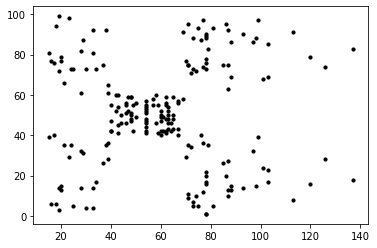

In [3]:
pt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],s=10,color='black')

In [4]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
x=df.iloc[:,3: ].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

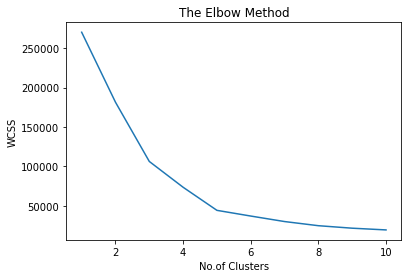

In [6]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pt.plot(range(1,11),wcss)
pt.title('The Elbow Method')
pt.xlabel('No.of Clusters')
pt.ylabel('WCSS')
pt.show()

In [7]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5,min_samples=5)
db1=dbscan.fit(x)
db1

DBSCAN(eps=5)

In [8]:
db=dbscan.fit_predict(x)
db

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [9]:
np.unique(db)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [10]:
lb=db1.labels_
lb

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [11]:
np.unique(lb)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

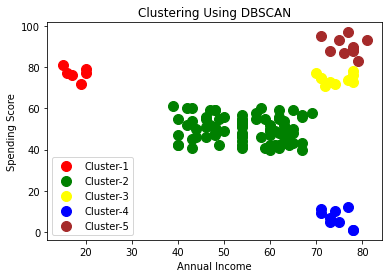

In [12]:
pt.scatter(x[lb==0,0],x[lb==0,1],s=100,c='red',label='Cluster-1')
pt.scatter(x[lb==1,0],x[lb==1,1],s=100,c='Green',label='Cluster-2')
pt.scatter(x[lb==2,0],x[lb==2,1],s=100,c='yellow',label='Cluster-3')
pt.scatter(x[lb==3,0],x[lb==3,1],s=100,c='blue',label='Cluster-4')
pt.scatter(x[lb==4,0],x[lb==4,1],s=100,c='brown',label='Cluster-5')
pt.title('Clustering Using DBSCAN')
pt.xlabel('Annual Income')
pt.ylabel('Spending Score')
pt.legend()
pt.show()

In [13]:
# 1.silhouette_score
from sklearn import metrics
silhouette_avg=metrics.silhouette_score(x,lb)
silhouette_avg

0.1135163893571667

In [14]:
# 2.Davies-Bould Index (DBI)
from sklearn import metrics
metrics.davies_bouldin_score(x,lb)

2.5520714073233335

In [15]:
# 3.Calinski-Harabasz index
from sklearn import metrics
metrics.calinski_harabasz_score(x,lb)

12.542026082219296

In [16]:
from sklearn import datasets
import matplotlib.pyplot as pt
from sklearn.cluster import DBSCAN

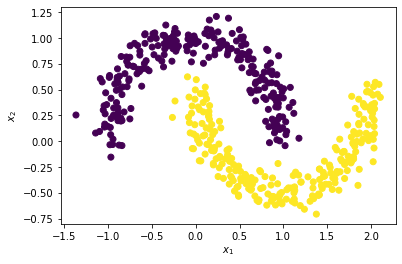

In [17]:
x,y=datasets.make_moons(n_samples=500,noise=0.1)
pt.scatter(x[:,0],x[:,1],c=y,label=y)
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')
pt.show()

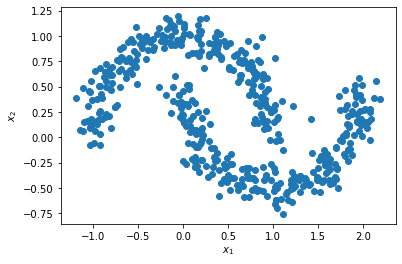

In [18]:
x,y=datasets.make_moons(n_samples=500,noise=0.1)
pt.scatter(x[:,0],x[:,1],label=y)
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')
pt.show()

In [19]:
dbscan_1=DBSCAN()
dbscan_1.fit(x)

DBSCAN()

In [20]:
dbscan_1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

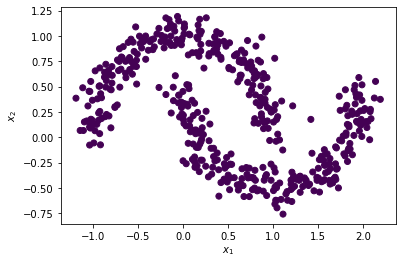

In [21]:
pt.scatter(x[:,0],x[:,1],c=dbscan_1.labels_,label=y)
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')
pt.show()

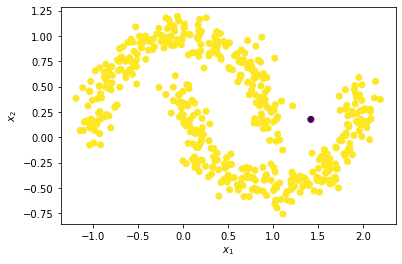

In [22]:
dbscan2=DBSCAN(eps=0.2,min_samples=5)
dbscan2.fit(x)
pt.scatter(x[:,0],x[:,1],c=dbscan2.labels_,label=y)
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')
pt.show()

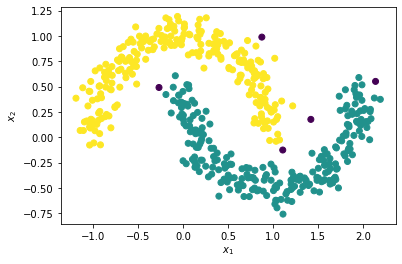

In [23]:
dbscan3=DBSCAN(eps=0.2,min_samples=15)
dbscan3.fit(x)
pt.scatter(x[:,0],x[:,1],c=dbscan3.labels_,label=y)
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')
pt.show()

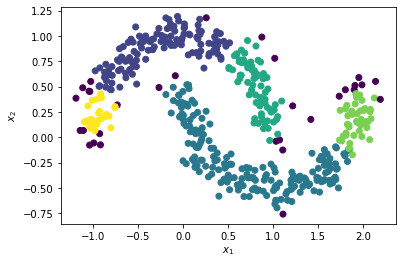

In [24]:
dbscan4=DBSCAN(eps=0.2,min_samples=25)
dbscan4.fit(x)
pt.scatter(x[:,0],x[:,1],c=dbscan4.labels_,label=y)
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')
pt.show()

In [25]:
dbscan3.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
        15,  19,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  64,  65,  66,  67,  68,  69,  71,  72,  73,
        74,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 109, 110, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143,
       146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159,
       160, 161, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 20

In [26]:
dbscan3.components_

array([[ 1.96203673e+00,  6.23073873e-02],
       [-3.29235258e-01,  9.70033644e-01],
       [ 1.60374356e+00, -1.63797069e-01],
       [ 7.99760358e-01, -3.26345818e-01],
       [ 3.43232514e-01,  8.56713171e-01],
       [ 1.20105347e+00, -4.23421761e-01],
       [ 6.67825122e-01, -4.78335669e-01],
       [ 9.02966280e-01, -4.24430396e-01],
       [ 9.89252757e-03,  1.35827668e-01],
       [ 3.81013435e-01, -2.23708216e-01],
       [ 1.40806997e+00, -4.63607010e-01],
       [ 1.15793549e+00, -5.36577902e-01],
       [ 7.54128955e-01,  7.42573528e-01],
       [ 4.86789608e-01, -2.82199697e-01],
       [ 2.08156161e+00,  2.52882388e-01],
       [ 1.21169784e+00, -3.45270161e-01],
       [ 1.13778160e-01,  2.13541061e-01],
       [-1.42484324e-01,  1.08478647e+00],
       [ 1.88249089e+00,  2.26280132e-01],
       [-9.28489189e-01,  3.52942734e-02],
       [ 2.10271445e-01,  1.86002133e-01],
       [ 6.61985701e-02,  4.79610953e-01],
       [-6.36131523e-01,  5.87441516e-01],
       [ 2.

In [27]:
# 1.silhouette_score
from sklearn import metrics
silhouette_avg=metrics.silhouette_score(x,dbscan4.labels_)
silhouette_avg

0.21792285377007392

In [28]:
# 2.Davies-Bould Index (DBI)
from sklearn import metrics
metrics.davies_bouldin_score(x,dbscan4.labels_)

2.2520493556519114

In [20]:
# 3.Calinski-Harabasz index
from sklearn import metrics
metrics.calinski_harabasz_score(x,dbscan4.labels_)

188.08510370833585

In [21]:
# 4.Rand Index
from sklearn.metrics.cluster import rand_score
rand_score(y,dbscan4.labels_)

0.7974108216432866

In [22]:
# 5.Fowlkes Mallows Score
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(y,dbscan4.labels_)

0.770731338888205

In [23]:
# 6.Adjusted Index
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,dbscan4.labels_)

0.5944961992942477